<a href="https://colab.research.google.com/github/JSJeong-me/KOSA_BIGDATA_DEEPLEARNING/blob/main/Feature_Engineering/4-xgb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### XGBoosting Easy version + Aggregated Data Set

In [1]:
import numpy as np                   # array, vector, matrix calculations
import pandas as pd                  # DataFrame handling
#import shapely                          # for consistent, signed variable importance measurements
import xgboost as xgb                # gradient boosting machines (GBMs)
import math

import matplotlib.pyplot as plt      # plotting
pd.options.display.max_columns = 999 # enable display of all columns in notebook

# enables display of plots in notebook
%matplotlib inline

np.random.seed(42)                # set random seed for reproducibility

In [2]:
# import XLS file
path1 = "./credit_cards_dataset.csv"
#data = pd.read_excel(path, skiprows=1) # skip the first row of the spreadsheet

path2 = "./Data_USD.csv"
#path = 'C:\\Users\\User\\Desktop\\data\\original_data.csv'
#data = pd.read_csv(path, skiprows=1) # skip the first row of the spreadsheet
data1 = pd.read_csv(path1) # skip the first row of the spreadsheet
data2 = pd.read_csv(path2) # skip the first row of the spreadsheet
# remove spaces from target column name

In [3]:
data1.shape

(30000, 25)

In [4]:
data2.shape

(30000, 11)

In [5]:
data2['ID']=np.nan

In [6]:
for i in range(0,30000):
    data2.loc[i,['ID']]=i+1

In [7]:
data2.tail(5)

,LIMIT_BAL_US,SEX,EDUCATION,MARRIAGE,AGE,PAY_SCORE_AVG,BILL_AVG_US,PAY_AMT_AVG_US,PAY_TO_BILL,CREDIT_UTILIZATION,DEFAULT_PAYMENT_NEXT_MO,ID
29995,7982.857143,1,3,1,39,0.00,4386.634429,257.326190,0.06,0.858855,0,29996.0
29996,5442.857143,1,3,2,43,-0.67,128.100667,87.630000,0.68,0.011220,0,29997.0
29997,1088.571429,1,2,2,37,1.33,426.332952,189.290476,0.44,0.118833,1,29998.0
29998,2902.857143,1,3,1,41,-0.17,1612.361762,890.094619,0.55,-0.020563,1,29999.0
29999,1814.285714,1,2,1,46,0.00,1396.238000,50.243619,0.04,0.958580,1,30000.0


In [8]:
data2.head(5)

,LIMIT_BAL_US,SEX,EDUCATION,MARRIAGE,AGE,PAY_SCORE_AVG,BILL_AVG_US,PAY_AMT_AVG_US,PAY_TO_BILL,CREDIT_UTILIZATION,DEFAULT_PAYMENT_NEXT_MO,ID
0,725.714286,2,2,1,24,-0.33,46.590857,4.166810,0.09,0.195650,1,1.0
1,4354.285714,2,2,2,26,0.50,103.275190,30.238095,0.29,0.022350,1,2.0
2,3265.714286,2,2,2,34,0.00,614.758619,66.632667,0.11,0.324878,0,3.0
3,1814.285714,2,2,1,37,0.00,1399.019905,50.727429,0.04,0.939800,0,4.0
4,1814.285714,1,2,1,57,-0.33,661.240619,357.105857,0.54,0.172340,0,5.0


In [9]:
data2=data2.drop('DEFAULT_PAYMENT_NEXT_MO', axis =1)

In [10]:
data2.shape

(30000, 11)

In [11]:
#pd.merge(data1, data2, on="key", how="outer")
data_sum = pd.merge(data2, data1, on="ID", how="left")

In [12]:
data_sum = data_sum.drop('ID', axis =1)

In [13]:
data_sum.shape

(30000, 34)

In [14]:
data_sum.head(5)

,LIMIT_BAL_US,SEX_x,EDUCATION_x,MARRIAGE_x,AGE_x,PAY_SCORE_AVG,BILL_AVG_US,PAY_AMT_AVG_US,PAY_TO_BILL,CREDIT_UTILIZATION,LIMIT_BAL,SEX_y,EDUCATION_y,MARRIAGE_y,AGE_y,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,725.714286,2,2,1,24,-0.33,46.590857,4.166810,0.09,0.195650,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,4354.285714,2,2,2,26,0.50,103.275190,30.238095,0.29,0.022350,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3265.714286,2,2,2,34,0.00,614.758619,66.632667,0.11,0.324878,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,1814.285714,2,2,1,37,0.00,1399.019905,50.727429,0.04,0.939800,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,1814.285714,1,2,1,57,-0.33,661.240619,357.105857,0.54,0.172340,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [15]:
#data = data_sum.rename(columns={'DEFAULT_PAYMENT_NEXT_MONTH': 'DEFAULT_NEXT_MONTH'})
data=data_sum

In [16]:
# assign target and inputs for GBM
#y = 'DEFAULT_NEXT_MONTH'
y='default.payment.next.month'
X = [name for name in data.columns if name not in ['ID', 'DEFAULT_PAYMENT_NEXT_MO','SEX_y', 'EDUCATION_y', 'MARRIAGE_y', 'AGE_y', 'default.payment.next.month']]
print('y =', y)
print('X =', X)

y = default.payment.next.month
X = ['LIMIT_BAL_US', 'SEX_x', 'EDUCATION_x', 'MARRIAGE_x', 'AGE_x', 'PAY_SCORE_AVG', 'BILL_AVG_US', 'PAY_AMT_AVG_US', 'PAY_TO_BILL', 'CREDIT_UTILIZATION', 'LIMIT_BAL', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']


In [17]:
data[X].shape

(30000, 29)

In [18]:
split_ratio=0.7

# execute split
split = np.random.rand(len(data[X])) < split_ratio
train=data[split]
test=data[~split]

print('Train data rows = %d. columns = %d' % (train.shape[0], train.shape[1]))
print('Test data rows = %d. columns = %d' % (test.shape[0], test.shape[1]))

Train data rows = 21087. columns = 34
Test data rows = 8913. columns = 34


In [19]:
print(test.shape)

(8913, 34)


In [20]:
print(train.shape)

(21087, 34)


In [21]:
# XGBoost uses SVMLight data structure, not Numpy arrays or Pandas DataFrames 

mod = xgb.XGBRegressor(
    gamma=1,                 
    learning_rate=0.01,
    max_depth=3,
    n_estimators=10000,                                                                    
    subsample=0.8,
    random_state=42,
    verbosity=0
)

In [22]:
mod.fit(train[X], train[y])

XGBRegressor(gamma=1, learning_rate=0.01, n_estimators=10000, random_state=42,
             subsample=0.8, verbosity=0)

In [23]:
ypred = mod.predict(test[X])

In [24]:
ypred.reshape(-1,1)

array([[0.38754538],
       [0.11899641],
       [0.10217604],
       ...,
       [0.95201015],
       [0.06899747],
       [0.09481606]], dtype=float32)

In [25]:
predictions = np.array([round(value) for value in ypred])

In [26]:
predictions.reshape(-1,1)

array([[0],
       [0],
       [0],
       ...,
       [1],
       [0],
       [0]])

In [27]:
test[y]

1        1
2        0
7        0
9        0
11       0
        ..
29982    1
29983    0
29991    1
29995    0
29996    0
Name: default.payment.next.month, Length: 8913, dtype: int64

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

In [29]:
accuracy = accuracy_score(test[y], predictions)
cm = confusion_matrix(test[y], predictions)
precision = precision_score(test[y], predictions)
recall = recall_score(test[y], predictions)

In [30]:
print(accuracy)
print(cm)
print(precision)
print(recall)

0.8171210591271177
[[6568  337]
 [1293  715]]
0.6796577946768061
0.3560756972111554


In [31]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

Confusion matrix, without normalization
[[6568  337]
 [1293  715]]


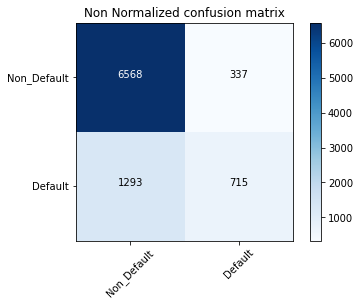

In [32]:
plt.figure()
plot_confusion_matrix(cm, classes=['Non_Default','Default'], normalize=False,
                      title='Non Normalized confusion matrix')